# Project 3

## 1. Label Decomposition

Import necessary library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
# Read in the data

df = pd.read_csv('cpi.csv', parse_dates= [['Year', 'Month']], index_col= 'Year_Month')

# Change the index name to 'Date'
df.index.name = 'Date'

,CPI,1-Month % Change,12-Month % Change
Date,,,
1970-01-01,37.9,0.5,6.2
1970-02-01,38.1,0.5,6.4
1970-03-01,38.3,0.5,6.1
1970-04-01,38.5,0.5,6.1
1970-05-01,38.6,0.3,6.0


Our current main focus is the CPI index, so let's decompose this feature first.
- First, decompose the CPI column into trend, seasonal, and residual components using additive method. 
- Second, apply multiplicative method


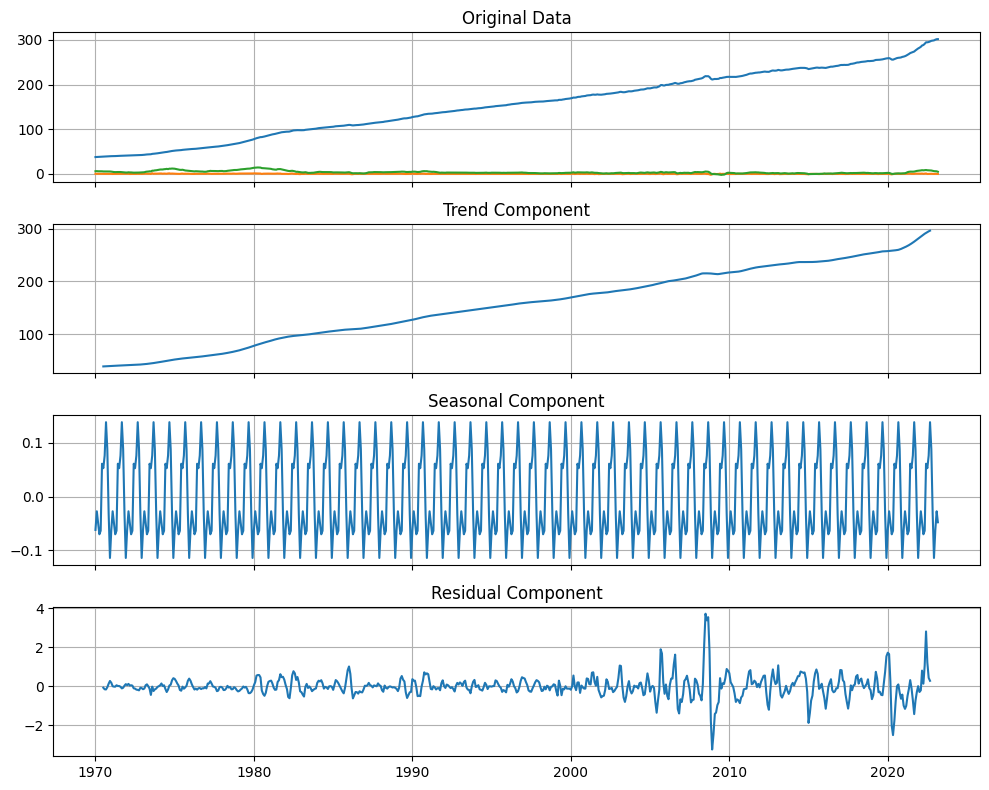

In [30]:
additive_decomposed = seasonal_decompose(df['CPI'], model='additive', period= 12)

# Plot the original data, trend, seasonal, and residual components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
ax1.plot(df)
ax1.set_title('Original Data')
ax1.grid()

# Trend component
ax2.plot(additive_decomposed.trend)
ax2.set_title('Trend Component')
ax2.grid()

# Seasonal component
ax3.plot(additive_decomposed.seasonal)
ax3.set_title('Seasonal Component')
ax3.grid()

# Residual component
ax4.plot(additive_decomposed.resid)
ax4.set_title('Residual Component')
ax4.grid()

plt.tight_layout()
plt.show()


In this additive decomposition, we set the period to 12, which is quite common most economic time series data. After we have adjusted for multiple periods, this yearly seasonality seems to be the most approporiate. 

### 1.1 Additive decomp's findings
- Seasonal component appears to be minimal compared to the original data and doesn't contribute significantly to the overall patterns in the data. It might be reasonable to shift our focus to trend and residual components. 
- Residuals exploded during the Financial Crisis 2008-09 and early covid time until now.
- Though residuals seem to have more impact on the orignal data than seasonal, its impact on the data is still very small. 

A statistical look into the seasonal component

In [27]:
additive_decomposed.seasonal.describe()

count    639.000000
mean      -0.000214
std        0.075661
min       -0.113837
25%       -0.061837
50%       -0.031789
75%        0.060934
max        0.138020
Name: seasonal, dtype: float64

## 2. Multiplicative Decomposition

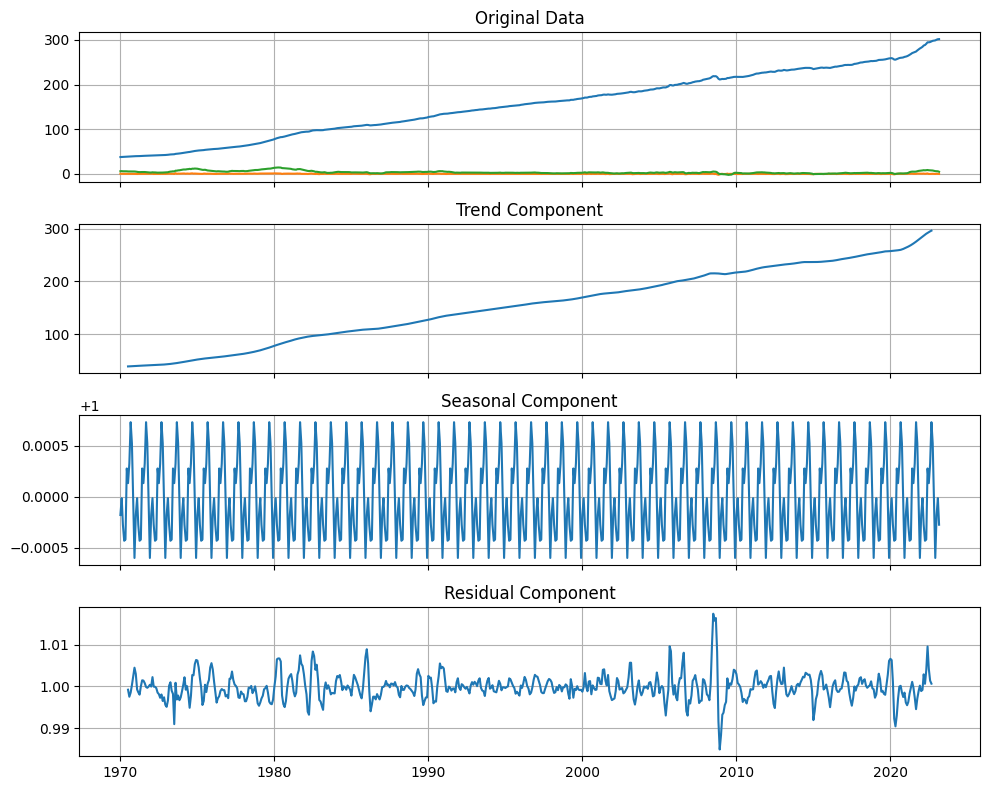

In [31]:
multiplicative_decomposed = seasonal_decompose(df['CPI'], model='multiplicative', period= 12)

# Plot the original data, trend, seasonal, and residual components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
ax1.plot(df)
ax1.set_title('Original Data')
ax1.grid()

# Trend component
ax2.plot(multiplicative_decomposed.trend)
ax2.set_title('Trend Component')
ax2.grid()

# Seasonal component
ax3.plot(multiplicative_decomposed.seasonal)
ax3.set_title('Seasonal Component')
ax3.grid()

# Residual component
ax4.plot(multiplicative_decomposed.resid)
ax4.set_title('Residual Component')
ax4.grid()

plt.tight_layout()
plt.show()


### Multiplicative decomp's findings

- Same conclusion as additive decomposition